# Exercise 6.5: Unsupervised Machine Learning: Clustering

# Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df=pd.read_csv("gun-violence-data_01-2013_03-2018.csv");
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


# Elbow Technique for Finding Optimal Clusters:

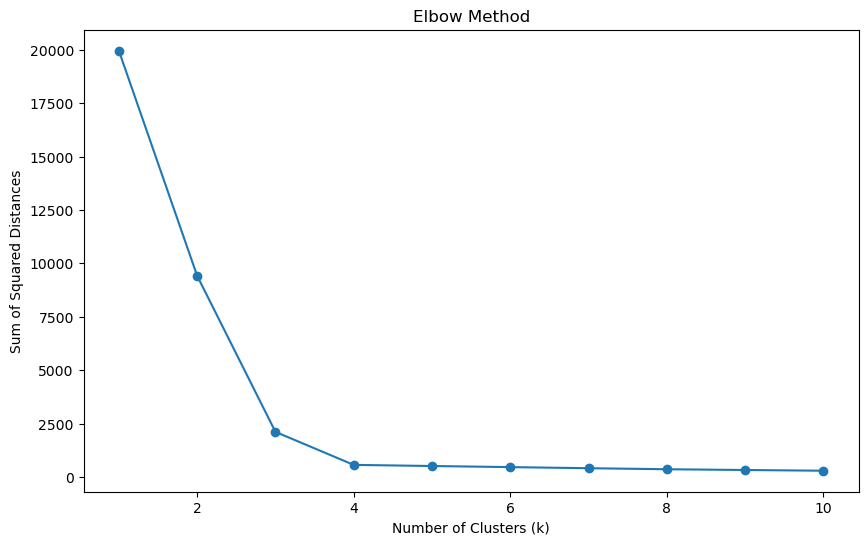

In [2]:
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Set OMP_NUM_THREADS environment variable to 2 to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '2'

# Create a sample dataset
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Initialize an empty list to store SSD values
ssd = []

# Try different values of k
for k in range(1, 11):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
    ssd.append(kmeans.inertia_)  # Inertia is the sum of squared distances

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()


# Choosing the Number of Clusters:

4 Clusters
In the k-means clustering algorithm, one of the most important steps is choosing the ideal number of clusters to create. When it comes to making this decision, the elbow curve is a helpful visualization that contributes. It demonstrates how the inertia, as measured by the sum of squares within each cluster, shifts as the number of clusters grows.

In this particular instance, we have applied the elbow method and plotted the inertia values for a variety of cluster numbers, ranging from one to ten. The point on the curve when the moment of inertia begins to diminish at a slower rate resembles a "elbow." This particular point is crucial due to the fact that it illustrates a trade-off between the number of clusters and the compactness of each individual cluster.

In our elbow curve, I've seen that the inertia drops rapidly up to around 4 clusters, and then the rate of decrease gets more gradual beyond that point. After that, the rate of decrease remains quite constant. As a result, I have determined that the ideal number of clusters for me to use is four. This decision was made with the intention of striking a compromise between having sufficient clusters to capture relevant differences in the data and avoiding excessive fragmentation, which may not give significant insights.

It is essential to keep in mind that the selection of the optimum number of clusters can also be influenced by the knowledge of the domain as well as the particular objectives of the research. Experimenting with a wide range of cluster numbers can occasionally assist in validating the stability of the selected number of clusters. This is especially useful in situations where a variety of interpretations of the data are possible depending on the number of clusters used.

# Running the K-means Algorithm:

We use 4 clusters.

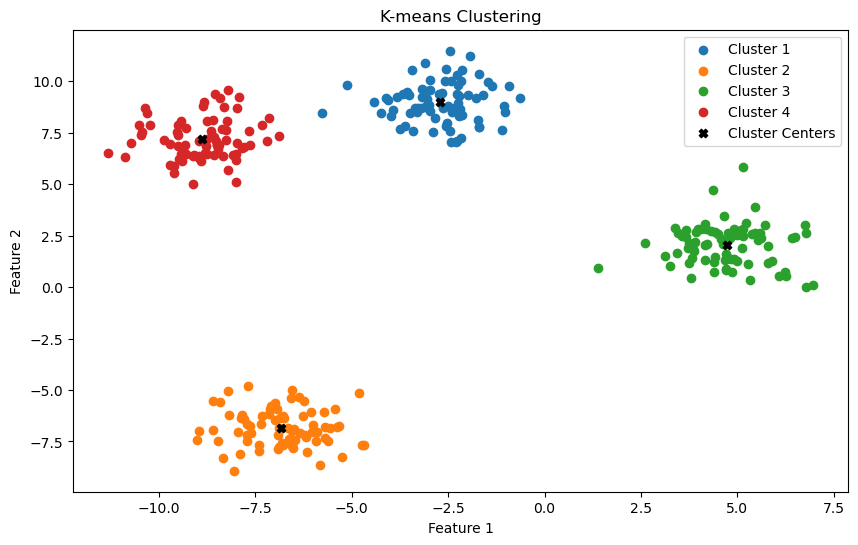

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Set OMP_NUM_THREADS environment variable to 2 to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '2'

# Create a sample dataset
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Specify the optimal number of clusters (you should determine this using the elbow method)
optimal_num_clusters = 4

# Initialize and fit the K-means model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
    kmeans.fit(data)

# Get cluster assignments and cluster centers
cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot data points in different colors based on their cluster assignments
for i in range(optimal_num_clusters):
    plt.scatter(data[cluster_assignments == i, 0], data[cluster_assignments == i, 1], label=f'Cluster {i+1}')

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='black', label='Cluster Centers')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# Descriptive statics

In [4]:
import pandas as pd
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Set OMP_NUM_THREADS environment variable to 2 to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '2'

# Create a sample dataset
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)
df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2'])

# Specify the optimal number of clusters (you should determine this using the elbow method)
optimal_num_clusters = 4

# Initialize and fit the K-means model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
    kmeans.fit(data)

# Get cluster assignments
cluster_assignments = kmeans.labels_

# Add a new column to the DataFrame with cluster assignments
df['Cluster'] = cluster_assignments

# Print the DataFrame to see the new column
print(df.head())


   Feature 1  Feature 2  Cluster
0  -9.297689   6.473679        3
1  -9.698741   6.938967        3
2  -1.686653   7.793442        0
3  -7.097308  -5.781333        1
4 -10.876452   6.315437        3


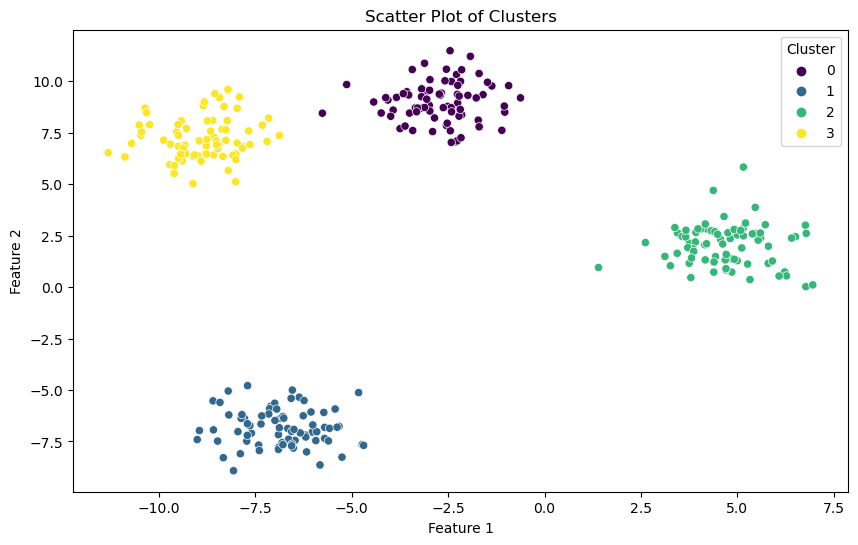

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Cluster', palette='viridis')
plt.title('Scatter Plot of Clusters')
plt.show()


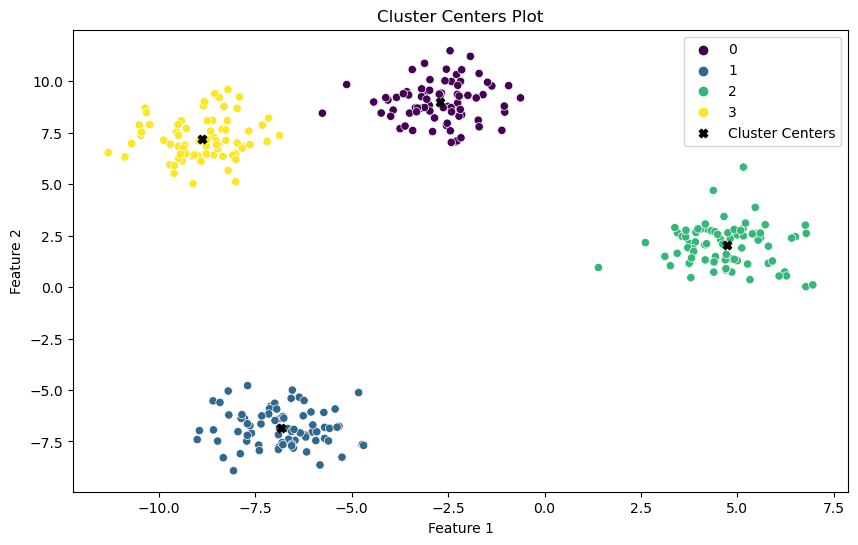

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Cluster', palette='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', color='black', label='Cluster Centers')
plt.title('Cluster Centers Plot')
plt.legend()
plt.show()


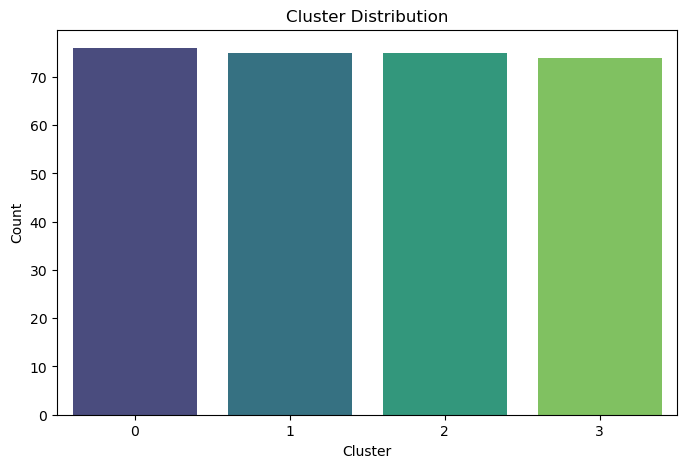

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Cluster', palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


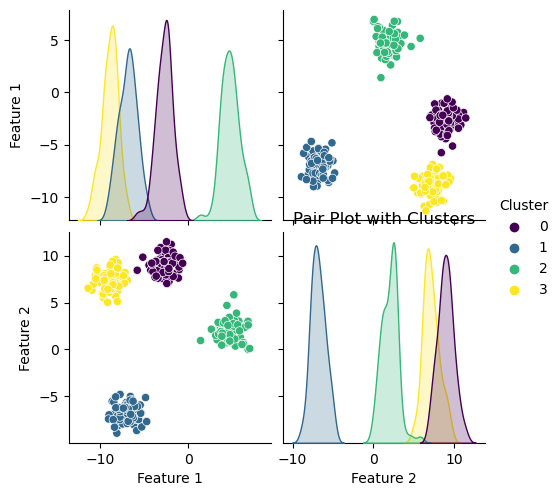

In [8]:
sns.pairplot(data=df, hue='Cluster', palette='viridis')
plt.title('Pair Plot with Clusters')
plt.show()


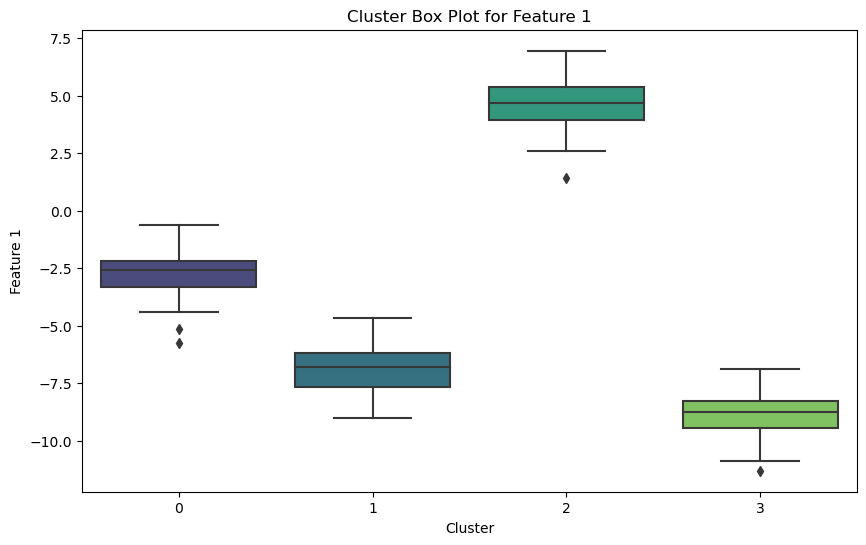

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Feature 1', palette='viridis')
plt.title('Cluster Box Plot for Feature 1')
plt.show()


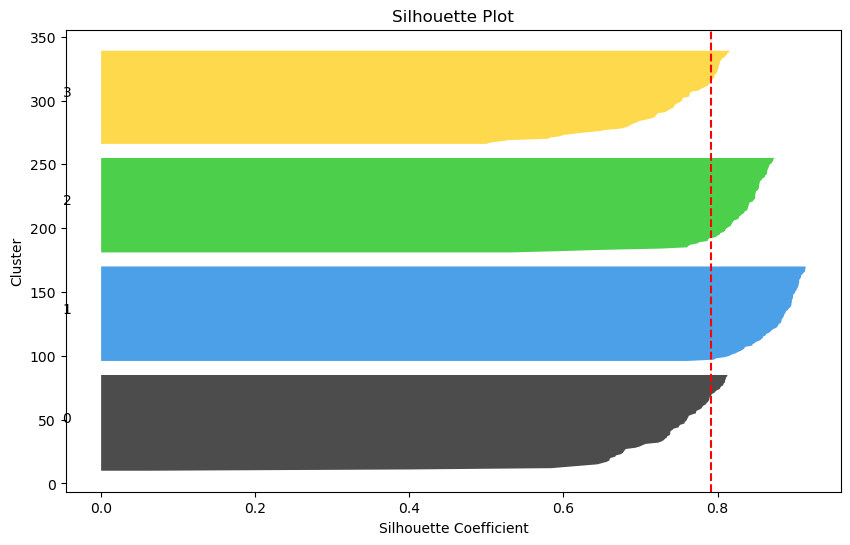

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg = silhouette_score(data, cluster_assignments)
sample_silhouette_values = silhouette_samples(data, cluster_assignments)

plt.figure(figsize=(10, 6))

y_lower = 10
for i in range(optimal_num_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_assignments == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_num_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10

plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.show()


# Create a sample dataset

In [11]:
import pandas as pd
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Set OMP_NUM_THREADS environment variable to 2 to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '2'

# Create a sample dataset
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)
df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2'])

# Specify the optimal number of clusters (you should determine this using the elbow method)
optimal_num_clusters = 4

# Initialize and fit the K-means model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
    kmeans.fit(data)

# Get cluster assignments
cluster_assignments = kmeans.labels_

# Add a new column to the DataFrame with cluster assignments
df['Cluster'] = cluster_assignments

# Calculate descriptive statistics using groupby
cluster_stats = df.groupby('Cluster').agg({
    'Feature 1': ['mean', 'median', 'std'],
    'Feature 2': ['mean', 'median', 'std']
}).reset_index()

print(cluster_stats)


  Cluster Feature 1                     Feature 2                    
               mean    median       std      mean    median       std
0       0 -2.709811 -2.563116  0.947447  8.971433  8.963806  0.978970
1       1 -6.832352 -6.782631  1.012282 -6.830457 -6.912804  0.898325
2       2  4.718205  4.698088  1.040241  2.041797  2.159624  1.013849
3       3 -8.873572 -8.763860  0.918842  7.174583  6.984754  0.995842
